In [2]:
import dac
from audiotools import AudioSignal
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio


# Download a model
model_path = dac.utils.download(model_type="44khz")
model = dac.DAC.load(model_path)

model.to('cuda')

DAC(
  (encoder): Encoder(
    (block): Sequential(
      (0): Conv1d(1, 64, kernel_size=(7,), stride=(1,), padding=(3,))
      (1): EncoderBlock(
        (block): Sequential(
          (0): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,))
              (2): Snake1d()
              (3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (1): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(9,), dilation=(3,))
              (2): Snake1d()
              (3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (2): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(27,), dilation=(9,))
              (2): Snake1d()
              

In [3]:
print(model)

DAC(
  (encoder): Encoder(
    (block): Sequential(
      (0): Conv1d(1, 64, kernel_size=(7,), stride=(1,), padding=(3,))
      (1): EncoderBlock(
        (block): Sequential(
          (0): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,))
              (2): Snake1d()
              (3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (1): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(9,), dilation=(3,))
              (2): Snake1d()
              (3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
            )
          )
          (2): ResidualUnit(
            (block): Sequential(
              (0): Snake1d()
              (1): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(27,), dilation=(9,))
              (2): Snake1d()
              

In [14]:
# Load audio signal file
signal = AudioSignal('./p225/p225/p225_001_mic1.wav')
signal.resample(44100)
# Encode audio signal as one long file
# (may run out of GPU memory on long files)
signal.to(model.device)

x = model.preprocess(signal.audio_data, signal.sample_rate)
z, codes, latents, _, _ = model.encode(x)

# Decode audio signal
y = model.decode(z)

In [3]:
x,y = x.detach().cpu().numpy().squeeze(), y.detach().cpu().numpy().squeeze()

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

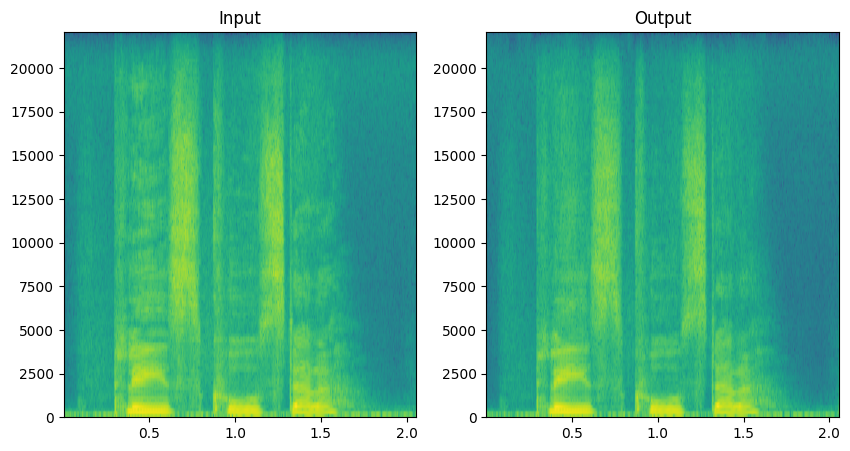

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].specgram(x, Fs=44100)
ax[0].set_title('Input')
ax[1].specgram(y, Fs=44100)
ax[1].set_title('Output')
plt.show()

In [53]:
np.mean(np.abs(x-y)), np.max(np.abs(x)), np.max(np.abs(y))

(0.01616913, 0.80935246, 0.8547382)

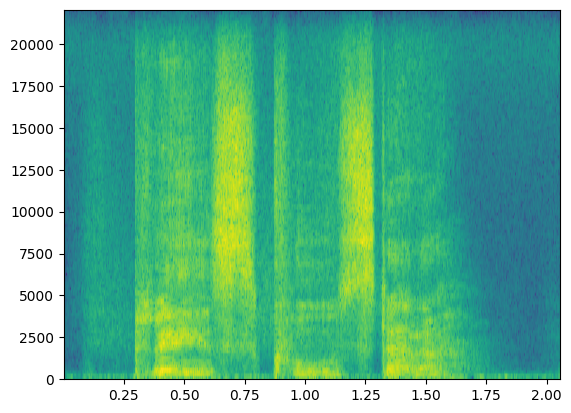

In [55]:
plt.specgram(x-y, Fs=44100)
plt.show()